In [1]:
import warnings                                 
warnings.filterwarnings('ignore')

import numpy as np                               
import pandas as pd                              
import matplotlib.pyplot as plt                  
import seaborn as sns                            

from dateutil.relativedelta import relativedelta 
from scipy.optimize import minimize             

import statsmodels.formula.api as smf            
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    
from tqdm import tqdm_notebook



%matplotlib inline

In [4]:
df = pd.read_csv('purchase_play.csv')

In [5]:
df.head()

,user_id,game_title,hours,purchase,play
0,5250,Alien Swarm,4.9,1,1
1,5250,Cities Skylines,144.0,1,1
2,5250,Counter-Strike,0.0,1,0
3,5250,Counter-Strike Source,0.0,1,0
4,5250,Day of Defeat,0.0,1,0


In [6]:
df = df[['game_title','hours']]
df.head()

,game_title,hours
0,Alien Swarm,4.9
1,Cities Skylines,144.0
2,Counter-Strike,0.0
3,Counter-Strike Source,0.0
4,Day of Defeat,0.0


In [9]:
print(len(df['game_title'].unique()))

5155


In [23]:
g = df.groupby(df['game_title'])

In [27]:
g = g.apply(lambda x:x.sum())

In [28]:
g.head()

,game_title,hours
game_title,,
007 Legends,007 Legends,0.7
0RBITALIS,0RBITALIS0RBITALIS0RBITALIS,1.2
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),1... 2... 3... KICK IT! (Drop That Beat Like a...,20.0
10 Second Ninja,10 Second Ninja10 Second Ninja10 Second Ninja1...,5.9
"10,000,000","10,000,000",3.6


In [30]:
g = g.drop(columns=['game_title'])
g.head()

,hours
game_title,
007 Legends,0.7
0RBITALIS,1.2
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),20.0
10 Second Ninja,5.9
"10,000,000",3.6


In [42]:
g.to_csv(r'g.csv')

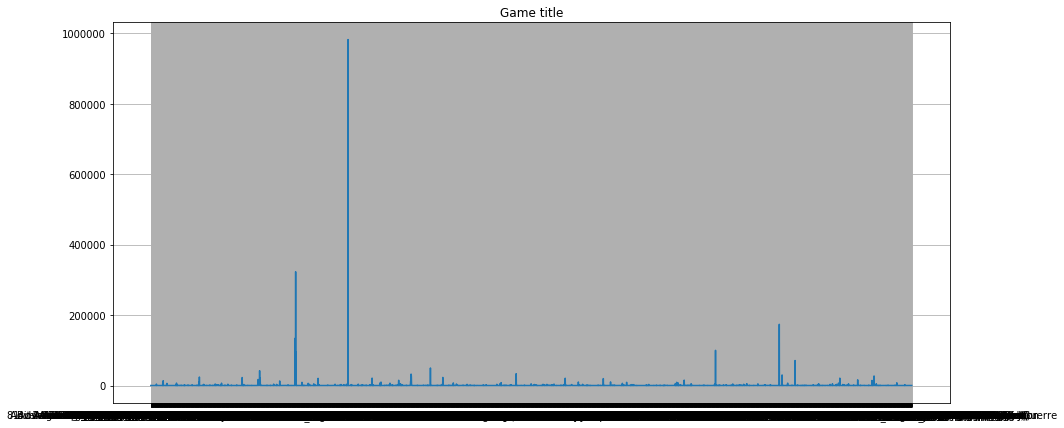

In [32]:
plt.figure(figsize=(15, 7))
plt.plot(g.hours)
plt.title('Game title')
plt.grid(True)
# plt.savefig('org_ads.png')
plt.show()

In [33]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [35]:
def moving_average(series, n):
    return np.average(series[-n:])

moving_average(g, 24) # prediction for the last observed day (past 24 hours)

28.629166666666663

In [36]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.savefig('currency_with_anomaly.png')
    plt.grid(True)

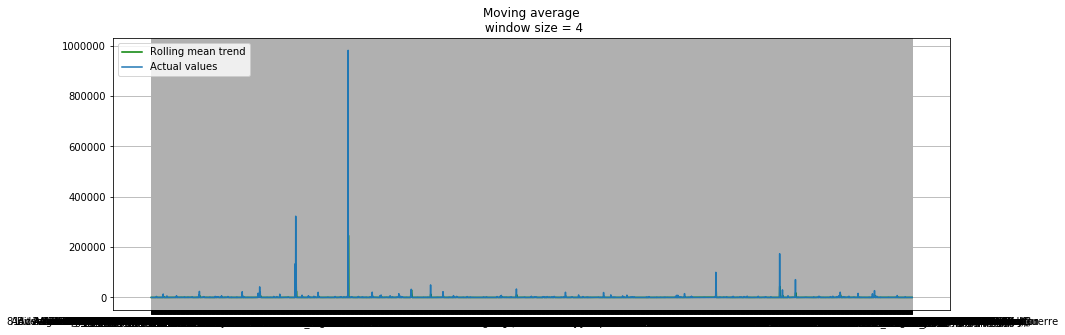

In [37]:
plotMovingAverage(g, 4) 

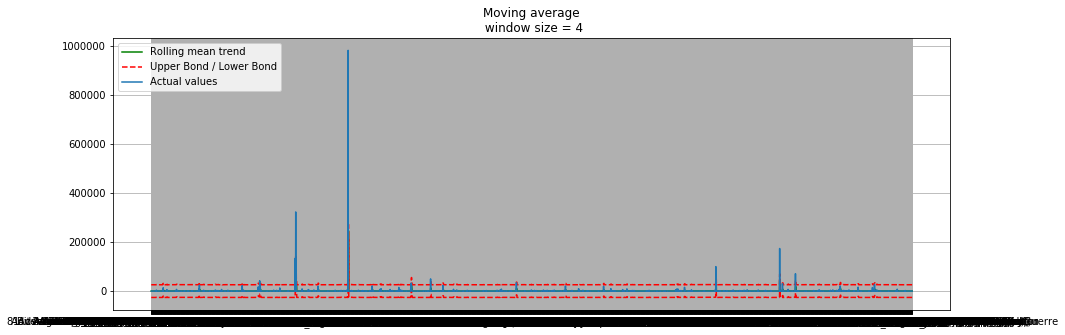

In [38]:
plotMovingAverage(g, 4, plot_intervals=True)

In [39]:
g_anomaly = g.copy()
g_anomaly.iloc[-20] = g_anomaly.iloc[-20] * 0.2 # say we have 80% drop of ads 

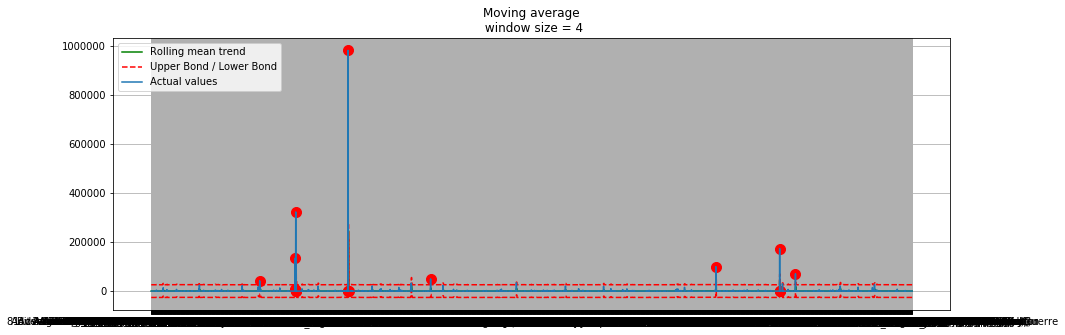

In [41]:
plotMovingAverage(g_anomaly, 4, plot_intervals=True, plot_anomalies=True)